### Importar lista de productos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib  as mlp
import numpy as np
import locale
import math

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from IPython.display import display
locale.setlocale(locale.LC_ALL, 'es_MX.UTF-8')
mlp.style.use('seaborn')


df = pd.read_csv(r'dataset.csv', decimal=".", thousands=",")
df['Fecha'] = pd.to_datetime(df['Fecha'])
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,Vendedor,Doc,Fecha,Nombres,Unidades,Unitario Venta,Ventas,Costo Unitario,Total Costo,Margen,PorMargen,Codigo,Descripcion
0,YOLEISY YOHANA POCHEZ PAREJO,FV R 11578,2020-07-01,Cliente General,4.0,2016.81,8067.23,1445.19,5780.78,2286.45,0.28,10012541,DISCO SEPARADOR CLUTCH
1,NaN,FV R 11578,2020-07-01,Cliente General,1.0,15168.07,15168.07,12132.58,12132.58,3035.48,0.20,10012780,CADENILLA DISTRIBUCION
2,NaN,FV R 11578,2020-07-01,Cliente General,1.0,12184.87,12184.87,8585.35,8585.35,3599.53,0.30,10012919,BANDA FRENO DEL Y TRAS
3,NaN,FV R 11578,2020-07-01,Cliente General,2.0,11344.54,22689.08,8585.35,17170.70,5518.38,0.24,10012919,BANDA FRENO DEL Y TRAS
4,NaN,FV R 11578,2020-07-01,Cliente General,1.0,17983.19,17983.19,13016.81,13016.81,4966.38,0.28,10015076,KIT GUIAS CADENILLA DIST


### Seleccionar producto

In [2]:
prod_id = '10045630'
ps = df.loc[df['Codigo'] == prod_id] 
prod_name = ps['Descripcion'].unique()[0].strip()
print('Producto seleccionado: ', prod_name)
display(ps.head())
display(ps.describe())

Producto seleccionado:  BAJ FILTRO GASOLINA


,Vendedor,Doc,Fecha,Nombres,Unidades,Unitario Venta,Ventas,Costo Unitario,Total Costo,Margen,PorMargen,Codigo,Descripcion
142,NaN,FV R 11496,2020-01-31,PABLO EMILIO SILVA BLANDON,1.0,14642.86,14642.86,12387.0,12387.0,2255.86,0.15,10045630,BAJ FILTRO GASOLINA
341,NaN,FV R 11523,2020-02-20,REDONDO CHAMORRO WENDY JOHANA,1.0,14642.86,14642.86,12387.0,12387.0,2255.86,0.15,10045630,BAJ FILTRO GASOLINA
1238,NaN,FV R 11834,2020-01-07,Cliente General,1.0,14642.86,14642.86,12387.0,12387.0,2255.86,0.15,10045630,BAJ FILTRO GASOLINA
1410,NaN,FV R 11831,2020-07-17,MENDOZA MARIA ALEJANDRA,1.0,19327.73,19327.73,12387.0,12387.0,6940.73,0.36,10045630,BAJ FILTRO GASOLINA
1411,NaN,FV R 11833,2020-07-17,RICAUTE BADEL RAMIRO ANTONIO,1.0,18151.26,18151.26,12387.0,12387.0,5764.26,0.32,10045630,BAJ FILTRO GASOLINA


,Unidades,Unitario Venta,Ventas,Costo Unitario,Total Costo,Margen,PorMargen
count,9.0,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,1.0,17336.603333,17336.603333,13261.222222,13261.222222,4075.381111,0.225556
std,0.0,2305.062099,2305.062099,1036.700026,1036.700026,1947.782670,0.087337
min,1.0,14642.860000,14642.860000,12387.000000,12387.000000,2255.860000,0.150000
25%,1.0,14642.860000,14642.860000,12387.000000,12387.000000,2255.860000,0.150000
50%,1.0,17142.860000,17142.860000,12387.000000,12387.000000,2788.860000,0.160000
75%,1.0,19327.730000,19327.730000,14354.000000,14354.000000,5814.070000,0.290000
max,1.0,20168.070000,20168.070000,14354.000000,14354.000000,6940.730000,0.360000


### Lista de precios de venta

In [3]:
precio_venta_list = ps.groupby(ps['Unitario Venta'], as_index=False).aggregate({
    'Unidades': 'sum',
    'PorMargen': 'mean'
})
max_venta_margen = precio_venta_list['PorMargen'].describe()['max']
max_venta_precio_row = precio_venta_list[precio_venta_list['PorMargen'] == max_venta_margen]
max_venta_precio_margen = max_venta_precio_row['Unitario Venta'].values[0]
print('Precio mayor de rendimiento', max_venta_precio_margen)

avg_precio_venta = precio_venta_list['Unitario Venta'].describe()['mean']
print('Precio promedio de venta:',avg_precio_venta)

max_sales_unidades = precio_venta_list['Unidades'].describe()['max']
max_price_sales_unidades = precio_venta_list[precio_venta_list['Unidades'] == max_sales_unidades]
# print(max_price_sales_unidades)
max_price_sale = max_price_sales_unidades['Unitario Venta']
max_price_sale = max_price_sale[max_price_sale.index[0]]
print('Precio venta más vendido:', max_price_sale)

max_sales_margen = precio_venta_list['PorMargen'].describe()['max']
max_price_sales_margen = precio_venta_list[precio_venta_list['PorMargen'] == max_sales_margen]
# print(max_price_sales_margen)
max_price_margen_sale = max_price_sales_margen['Unitario Venta']
max_price_margen_sale = max_price_margen_sale[max_price_margen_sale.index[0]]
print('Precio de rendimiento mayor de ventas:', max_price_margen_sale)

avg_margen = precio_venta_list['PorMargen'].describe()['mean']
print('Rendimiento promedio:', avg_margen)

display(precio_venta_list)
display(precio_venta_list.describe())

Precio mayor de rendimiento 19327.73
Precio promedio de venta: 17886.556
Precio venta más vendido: 14642.86
Precio de rendimiento mayor de ventas: 19327.73
Rendimiento promedio: 0.256


,Unitario Venta,Unidades,PorMargen
0,14642.86,3.0,0.15
1,17142.86,2.0,0.16
2,18151.26,1.0,0.32
3,19327.73,1.0,0.36
4,20168.07,2.0,0.29


,Unitario Venta,Unidades,PorMargen
count,5.000000,5.00000,5.000000
mean,17886.556000,1.80000,0.256000
std,2146.334335,0.83666,0.095551
min,14642.860000,1.00000,0.150000
25%,17142.860000,1.00000,0.160000
50%,18151.260000,2.00000,0.290000
75%,19327.730000,2.00000,0.320000
max,20168.070000,3.00000,0.360000


The Linear regression score on training data is  0.65
precio de venta sugerido 18281.726209451062


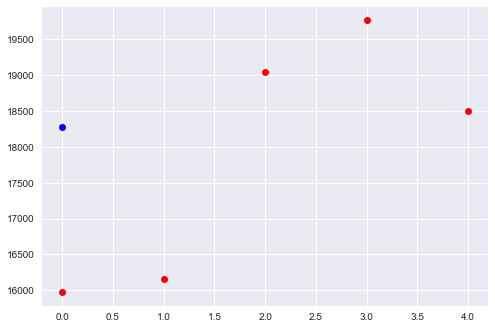

In [4]:
saleX_train = precio_venta_list[['PorMargen']]
saleY_train = precio_venta_list['Unitario Venta']
saleX_test = precio_venta_list[['PorMargen']]
saleY_test = precio_venta_list['Unitario Venta']

sc_X = StandardScaler()

saleX_train = sc_X.fit_transform(saleX_train.values)
saleX_test = sc_X.transform(saleX_test)

# Entrenación
reg = LinearRegression().fit(saleX_train, saleY_train)
print("The Linear regression score on training data is ", round(reg.score(saleX_train, saleY_train),2))

predict = reg.predict(saleX_test)
predict_sale_sug = reg.predict([[avg_margen]])
print('precio de venta sugerido', predict_sale_sug[0])

plt.plot(predict, 'ro', predict_sale_sug, 'bo')
plt.show()

### Lista de precios de compra

In [5]:
precio_compra_list = ps.groupby(ps['Costo Unitario'], as_index=False).aggregate({
    'Unidades': 'sum',
    'PorMargen': 'mean',
    'Unitario Venta': 'mean'
})

avg_buy_price = precio_compra_list['Costo Unitario'].describe()['mean']
print('Precio promedio de compra', avg_buy_price)

avg_buy_margen = precio_compra_list['PorMargen'].describe()['mean']
print('Rendimiento promedio de compra',avg_buy_margen)

display(precio_compra_list)
display(precio_compra_list.describe())

Precio promedio de compra 13370.5
Rendimiento promedio de compra 0.22549999999999998


,Costo Unitario,Unidades,PorMargen,Unitario Venta
0,12387.0,5.0,0.226,16281.514
1,14354.0,4.0,0.225,18655.465


,Costo Unitario,Unidades,PorMargen,Unitario Venta
count,2.000000,2.000000,2.000000,2.00000
mean,13370.500000,4.500000,0.225500,17468.48950
std,1390.879039,0.707107,0.000707,1678.63685
min,12387.000000,4.000000,0.225000,16281.51400
25%,12878.750000,4.250000,0.225250,16875.00175
50%,13370.500000,4.500000,0.225500,17468.48950
75%,13862.250000,4.750000,0.225750,18061.97725
max,14354.000000,5.000000,0.226000,18655.46500


The Linear regression score on training data is  1.0
precio sugerido de compra 13148.720750000028


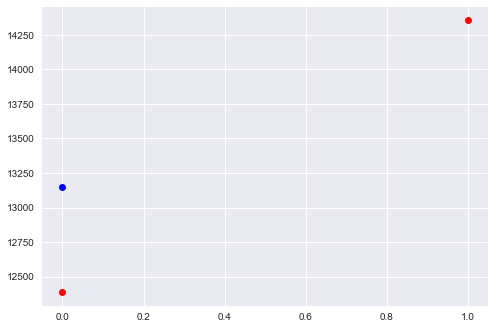

In [6]:
buyX_train = precio_compra_list[['PorMargen']]
buyY_train = precio_compra_list['Costo Unitario']
buyX_test = precio_compra_list[['PorMargen']]
buyY_test = precio_compra_list['Costo Unitario']

sc_X = StandardScaler()

buyX_train = sc_X.fit_transform(buyX_train.values)
buyX_test = sc_X.transform(buyX_test)

# Entrenación
reg = LinearRegression().fit(buyX_train, buyY_train)
print("The Linear regression score on training data is ", round(reg.score(buyX_train, buyY_train),2))

predict = reg.predict(buyX_test)
predict_buy_sug = reg.predict([[avg_buy_margen]])
predict_buy_sug = predict_buy_sug[0]
print('precio sugerido de compra',  predict_buy_sug)

plt.plot(predict, 'ro', predict_buy_sug, 'bo')
plt.show()

### Lista de ventas mensuales

In [7]:
ps_dates = ps
ps_dates = ps_dates.set_index('Fecha')
meses_list = ps_dates.groupby(pd.Grouper(freq="M")).aggregate({
    'Unidades': 'sum',
    'Unitario Venta': 'mean',
    'Costo Unitario': 'mean',
    'Ventas': 'sum',
    'Total Costo': 'sum',
    'Margen': 'sum',
    'PorMargen': 'mean',
}).dropna()

max_sales = meses_list['Unidades'].describe()['max']
max_sales_month = meses_list[meses_list['Unidades'] == max_sales]
sales_months = []
for month, row in max_sales_month.iterrows():
    str_month = month.strftime('%B')
    sales_months.append(str_month)
print('Meses con mayor ventas:', sales_months)


max_margen = meses_list['PorMargen'].describe()['max']
max_margen_month = meses_list[meses_list['PorMargen'] == max_margen]
margen_months = []
for month, row in max_margen_month.iterrows():
    str_month = month.strftime('%B')
    margen_months.append(str_month)
print('Mes con mayor rendimiento:', margen_months)

display(meses_list)
display(meses_list.describe())

Meses con mayor ventas: ['julio']
Mes con mayor rendimiento: ['julio']


,Unidades,Unitario Venta,Costo Unitario,Ventas,Total Costo,Margen,PorMargen
Fecha,,,,,,,
2020-01-31,2.0,14642.860000,12387.000000,29285.72,24774.0,4511.72,0.150000
2020-02-29,1.0,14642.860000,12387.000000,14642.86,12387.0,2255.86,0.150000
2020-07-31,3.0,19215.686667,13042.666667,57647.06,39128.0,18519.06,0.323333
2020-08-31,2.0,18655.465000,14354.000000,37310.93,28708.0,8602.93,0.225000
2020-10-31,1.0,17142.860000,14354.000000,17142.86,14354.0,2788.86,0.160000


,Unidades,Unitario Venta,Costo Unitario,Ventas,Total Costo,Margen,PorMargen
count,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,1.80000,16859.946333,13304.933333,31205.886000,23870.200000,7335.686000,0.201667
std,0.83666,2161.271822,994.367733,17408.308453,10948.099936,6729.167932,0.074870
min,1.00000,14642.860000,12387.000000,14642.860000,12387.000000,2255.860000,0.150000
25%,1.00000,14642.860000,12387.000000,17142.860000,14354.000000,2788.860000,0.150000
50%,2.00000,17142.860000,13042.666667,29285.720000,24774.000000,4511.720000,0.160000
75%,2.00000,18655.465000,14354.000000,37310.930000,28708.000000,8602.930000,0.225000
max,3.00000,19215.686667,14354.000000,57647.060000,39128.000000,18519.060000,0.323333


The Linear regression score on training data is  0.35
Se venderán 4 unidades en 2 meses


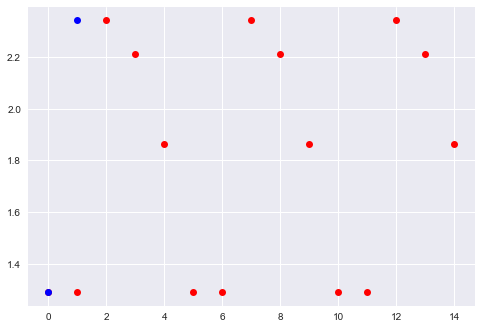

In [8]:
unitsX_train = meses_list[['Unitario Venta']]
unitsY_train = meses_list['Unidades']
unitsX_test = meses_list[['Unitario Venta']]
unitsY_test = meses_list['Unidades']

sc_X = StandardScaler()

unitsX_train = sc_X.fit_transform(unitsX_train)
unitsX_test = sc_X.transform(unitsX_test)

# Entrenación
reg = LinearRegression().fit(unitsX_train, unitsY_train)
print("The Linear regression score on training data is ", round(reg.score(unitsX_train, unitsY_train),2))

# Basado en la cantidad de meses obtenidos, se ajusta para predecir al menos 1 año
repeats = (12 - len(unitsX_test)) / int(len(unitsX_test)) 
repeats = math.ceil(repeats) + 1
unitsX_test = np.tile(unitsX_test,(repeats, 1))

# meses que el usuario quiere conocer en predicción
months_req = 2
months_required = unitsX_test[1:months_req +1 ]

predict_year=reg.predict(unitsX_test)
display(predict_year)
predict_months = reg.predict(months_required)

cantidad_predicted = math.ceil(predict_months.sum())
print('Se venderán', cantidad_predicted, 'unidades en', months_req, 'meses')
plt.plot(predict_year, 'ro', predict_months, 'bo')
plt.show()

The Linear regression score on training data is  0.7


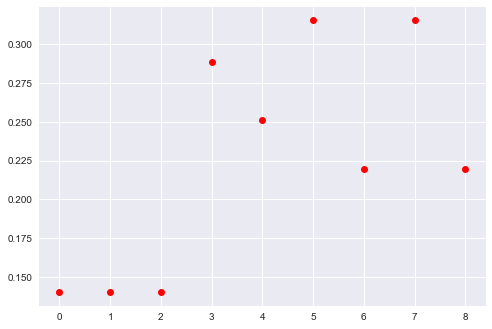

In [9]:

prod_list = ps[['Fecha', 'Unidades', 'Ventas', 'Total Costo', 'Margen', 'PorMargen']]

picaX_train = prod_list[['Ventas']]
picaY_train = prod_list['PorMargen']
picaX_test = prod_list[['Ventas']]
picaY_test = prod_list['PorMargen']

sc_X = StandardScaler()

picaX_train = sc_X.fit_transform(picaX_train.values)
picaX_test = sc_X.transform(picaX_test)

# Entrenación
reg = LinearRegression().fit(picaX_train, picaY_train)
print("The Linear regression score on training data is ", round(reg.score(picaX_train, picaY_train),2))

predict = reg.predict(picaX_test)
# predict_sug = reg.predict([[avg_margen]])
# print(predict_sug)

plt.plot(predict, 'ro')
plt.show()

## Ofertas del proveedor

In [10]:
descuento = .20
cantidad_condicion = 20
stock = 5
predict_sale_sug
predict_buy_sug

capital_invertido = stock * avg_buy_price
print('capital_invertido:', capital_invertido)

ahorro_unit = predict_buy_sug * descuento
print('ahorro por unidad:', ahorro_unit)
precio_desc = predict_buy_sug - ahorro_unit
print('precio con descuento:', precio_desc)
ahorro_total = ahorro_unit * cantidad_condicion
print('ahorro total:', ahorro_total)
inversion_total = capital_invertido + (precio_desc * cantidad_condicion)
print('Inversión total supuesta:', inversion_total)

capital_invertido: 66852.5
ahorro por unidad: 2629.744150000006
precio con descuento: 10518.976600000022
ahorro total: 52594.88300000012
Inversión total supuesta: 277232.0320000005


### Escenario

In [11]:
inversion_restante = -(inversion_total)
print('inversión restante:',inversion_restante)
stock_restante = stock + cantidad_condicion
# print('stock restante:', stock_restante)
year_sales = predict_year[0:12]
# print(year_sales)

ganancias = []
for cant in year_sales:
    stock_restante = stock_restante - cant
    # print('stock_restante',stock_restante)
    posibles_ventas = cant * predict_sale_sug
    # print('posibles_ventas',posibles_ventas)
    inversion_restante = inversion_restante + posibles_ventas
    # print('inversion restante',inversion_restante)
    if inversion_restante > 0:
        ganancias.append(stock_restante * predict_sale_sug)

if len(ganancias) > 0:
    ganancias = ganancias[0].sum()
    print('ganancias', ganancias)
    ganancias_sobre_ahorro = ganancias - ahorro_total
    print('ganancias sobre ahorro:', ganancias_sobre_ahorro)
    if ganancias_sobre_ahorro > 0 :
        print('La oferta es conveniente')
        margen_ganancias = (ahorro_total * 100)/ganancias
        print('ganancias de:', margen_ganancias,'%')
    else:
        print('Solicita más descuento')
else:
    print('La condición de compra es alta')

inversión restante: -277232.0320000005
ganancias 162066.71038580989
ganancias sobre ahorro: 109471.82738580977
La oferta es conveniente
ganancias de: 32.45261341752093 %
